#데이터 준비

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

# 데이터 전처리

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42,test_size = 0.25)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

#모델 선택

In [ ]:
from sklearn.linear_model import LinearRegression

#모델 생성

In [ ]:
lr = LinearRegression()
# 모델 훈련
lr.fit(train_input,train_target)

LinearRegression()

In [ ]:
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


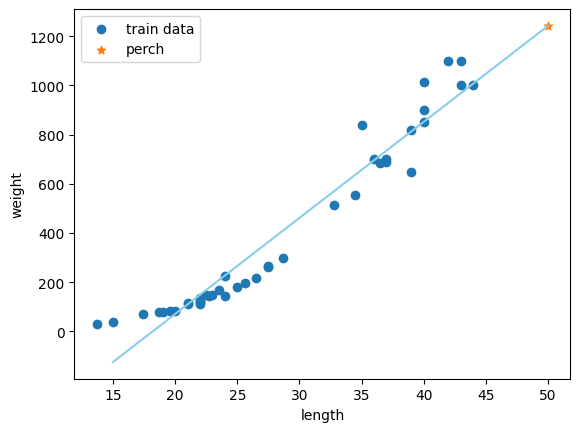

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target,label="train data")

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_],color='skyblue')

plt.scatter(50,1241.8,marker="*",label = 'perch')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()

plt.show()

In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


#다항회귀

In [ ]:
#특성공학을 도입한 다항회귀
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))


In [ ]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr2 = LinearRegression()
lr2.fit(train_poly,train_target)

print(lr2.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
print(lr2.coef_,lr2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


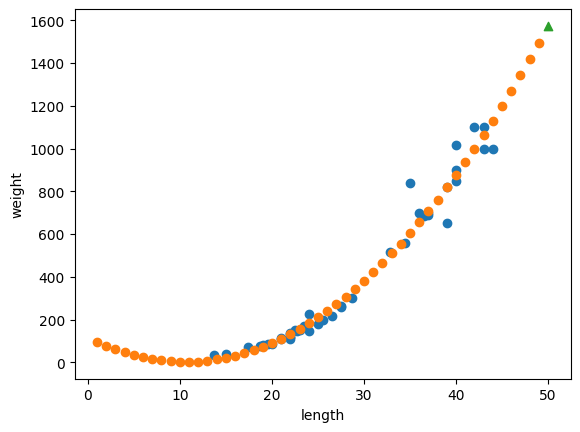

In [ ]:
x=np.arange(1,50)
plt.scatter(train_input,train_target)

plt.scatter(x,lr2.coef_[0]*x**2+lr2.coef_[1]*x+lr2.intercept_)

plt.scatter([50],[1574],marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr2.score(train_poly,train_target))
print(lr2.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


다중 회귀

In [ ]:
import pandas as pd

perch_full = pd.read_csv("/content/drive/MyDrive/AIML_bum/perch_full.csv")
print(perch_full)

df = perch_full

perch_full = df.to_numpy()

print(perch_full)

print(perch_full[:6])

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [ ]:
#label data
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
train_input,test_input,train_target,test_target = train_test_split(perch_full, perch_weight, random_state=42)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# poly는 규칙이고 fit을 통해 만든다 transform은 규칙을 적용하여 input을 만든다..
poly = PolynomialFeatures(include_bias=False)
print(train_input)
poly.fit(train_input)
train_poly = poly.transform(train_input)

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]


In [ ]:
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names_out()


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
test_poly.shape

(14, 9)

In [ ]:
lr3  = LinearRegression()
lr3.fit(train_poly,train_target) # 다중회귀
print(lr3.score(train_poly,train_target))
print(lr3.score(test_poly,test_target))

0.9903183436982125
0.9714559911594111


In [ ]:
# 더많은 특성을 만들어보자 PolynomialFeatures degree default는 2다

poly_5 = PolynomialFeatures(degree=5, include_bias=False)
print(train_input)
poly_5.fit(train_input)
train_poly = poly_5.transform(train_input)
test_poly = poly_5.transform(test_input)

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]


In [ ]:
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly,train_target)

LinearRegression()

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target)) # 엄청난 과대적합

0.9999999999996433
-144.40579436844948


# 규제

In [ ]:
#규제전 표준화
#  변수가 결과에 미치는 영향을 정규화한다

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(test_poly.shape)

(14, 55)


# 릿지회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)


Ridge()

In [ ]:
print(ridge.score(test_scaled,test_target))

0.9790693977615387


In [ ]:
# 적절한 규제강도(alpha) 찾기

import matplotlib.pyplot as plt
train_score = []
test_score = []


In [ ]:
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

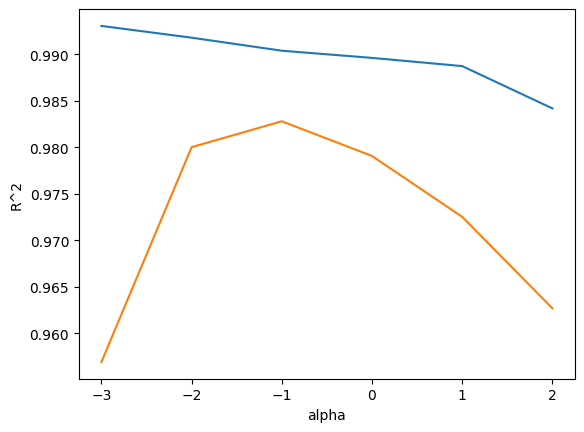

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [ ]:
# alpha 값 0.1로 최종 모델 훈련 후 모델 검증

ridge_01 = Ridge(alpha = 0.1)

ridge_01.fit(train_scaled,train_target)

print(ridge_01.score(train_scaled,train_target))
print(ridge_01.score(test_scaled,test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
#lasso 회귀

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.alpha)

1.0


In [ ]:
print(lasso.score(test_scaled,test_target))
print(lasso.score(train_scaled,train_target))

0.9800593698421883
0.989789897208096


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha , max_iter=10000)
  lasso.fit(train_scaled,train_target) # 다항회귀에서 특성공학 후 데이터 정규화가 좋은 순서임

  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


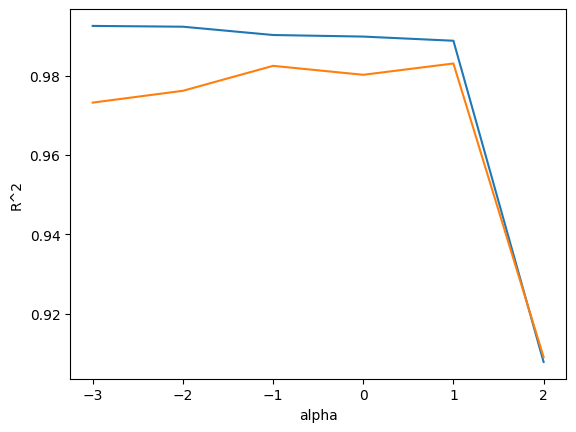

In [ ]:
#규제강도 찾기
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.xlabel("alpha")
plt.ylabel("R^2")

plt.show()


In [ ]:
#alpah를 10으로 하여 최종 모델 훈련후 점수 확인
lasso_10 = Lasso(alpha=10)
lasso_10.fit(train_scaled,train_target)

print(lasso_10.score(train_scaled,train_target))
print(lasso_10.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso_10.coef_ == 0)) # 15개의 특성만 사용함

40
